<a href="https://colab.research.google.com/github/Jorgemontanez25/PGP-AIML-BA-UTA-Jan25-B/blob/main/INN_Learner_Notebook_Full_code_Jorge_Monta%C3%B1ez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 -q --user


## Importing necessary libraries

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Importe SMOTE
from imblearn.over_sampling import SMOTE

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data, AI and Machine Learning UT/Project 4: Introduction to Neural Networks: Bank Churn Prediction/bank-1.csv')

In [ ]:
data=df.copy()

## Data Overview

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.shape

(10000, 14)

The DataFrame consists of 1,000 rows and 14 columns (features).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###Observations:
In our DataFrame, we have 3 object-type features and 11 numeric (int/float) features. It appears that there are no missing values, but we will verify this later.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
for col in data.columns:
    print(f"Column '{col}': {data[col].nunique()} unique values")

Column 'RowNumber': 10000 unique values
Column 'CustomerId': 10000 unique values
Column 'Surname': 2932 unique values
Column 'CreditScore': 460 unique values
Column 'Geography': 3 unique values
Column 'Gender': 2 unique values
Column 'Age': 70 unique values
Column 'Tenure': 11 unique values
Column 'Balance': 6382 unique values
Column 'NumOfProducts': 4 unique values
Column 'HasCrCard': 2 unique values
Column 'IsActiveMember': 2 unique values
Column 'EstimatedSalary': 9999 unique values
Column 'Exited': 2 unique values


###Observations:
After analyzing data types and unique values, we can identify key characteristics of our dataset:
*   Variables such as RowNumber, CustomerId, and Surname appear to carry no predictive power and are likely candidates for removal.
*   Numerical features like CreditScore, Age, Balance, and EstimatedSalary will require scaling to ensure optimal neural network performance.





In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


###Observations:
As mentioned earlier, there are no null values in our DataFrame.

In [ ]:
data.duplicated().sum()

np.int64(0)

#Observations:
There is no duplicate values in our DataFrame.

In [ ]:
data = data.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Observations:
Since the features 'RowNumber', 'CustomerId', and 'Surname' do not provide any predictive value for our target variable 'Exited', we will proceed to drop them from the DataFrame.

## Exploratory Data Analysis

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

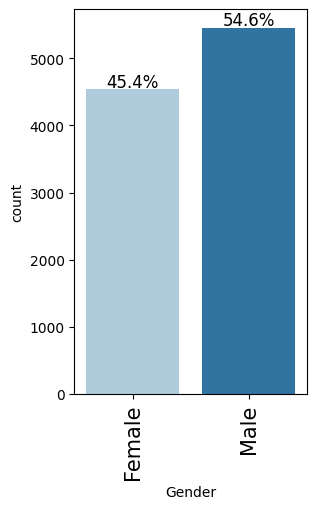

In [ ]:
labeled_barplot(data, "Gender",perc=True)

###Observations:
54.6% of the clients in the DataFrame are male, while 45.4% are female.


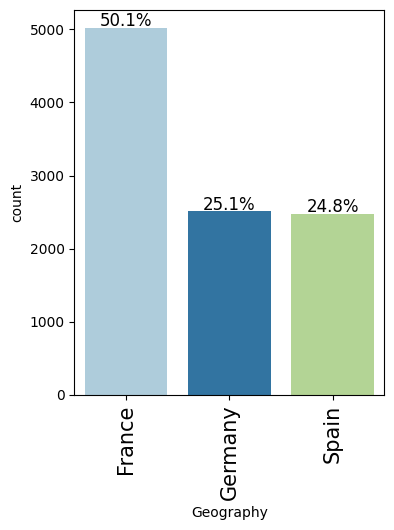

In [ ]:
labeled_barplot(data, "Geography",perc=True)

###Observations:
The clients in the DataFrame represent three geographic locations: 50.1% are from France, 25.1% from Germany, and 24.8% from Spain.

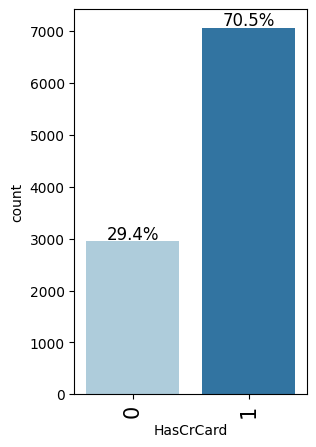

In [ ]:
labeled_barplot(data, "HasCrCard",perc=True)

###Observations:
70.5% of the clients in the DataFrame have a credit card, while 29.5% do not.

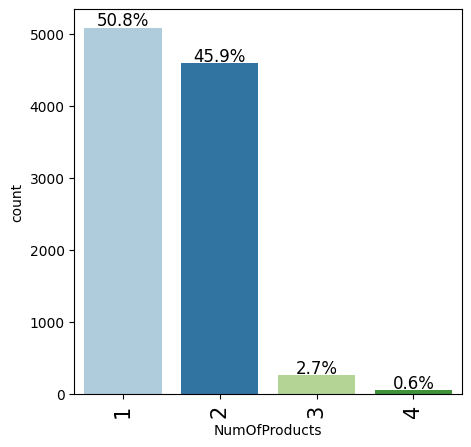

In [ ]:
labeled_barplot(data, "NumOfProducts",perc=True)

###Observations:
50.8% of the clients have only one product with the bank, 45.9% have two, 2.7% have three, and only 0.6% have four.

### Bivariate Analysis

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


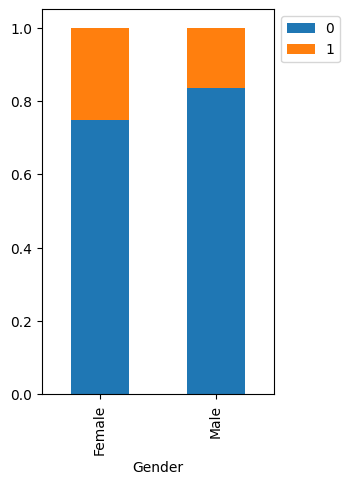

In [ ]:
stacked_barplot(data, "Gender", "Exited")

###Observations:
*   Female churn rate: 1139 / 4543 ≈ 25.1%
*   Male churn rate: 898 / 5457 ≈ 16.5%

Female clients are more likely to churn than male clients.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


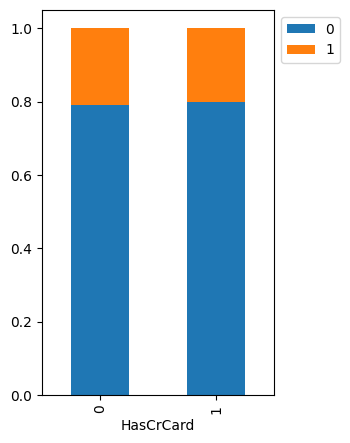

In [ ]:
stacked_barplot(data, "HasCrCard", "Exited")

###Observations:
*   With Credit Card: 1,424 / 7,055 ≈ 20.2%
*   Without Credit Card: 613 / 2,945 ≈ 20.8%

There is a very similar churn proportion between those who have a credit card and those who don't.




Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


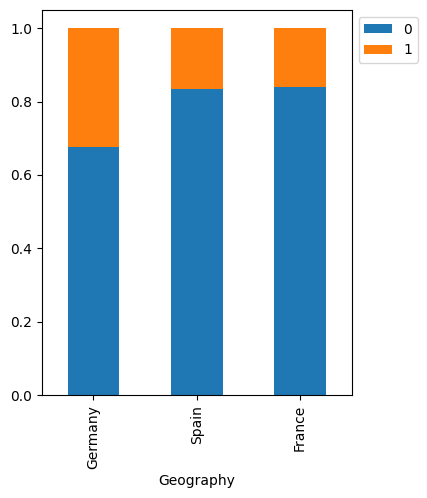

In [ ]:
stacked_barplot(data, "Geography", "Exited")

###Observations:
Churn rates:
*   Germany: 814 / 2,509 ≈ 32.4%
*   Spain: 810 / 5,014 ≈ 16.2%
*   France: 413 / 2,477 ≈ 16.7%

Germany shows a much higher churn rate compared to France and Spain.
France and Spain have similar and notably lower churn rates, around half that of Germany.




Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


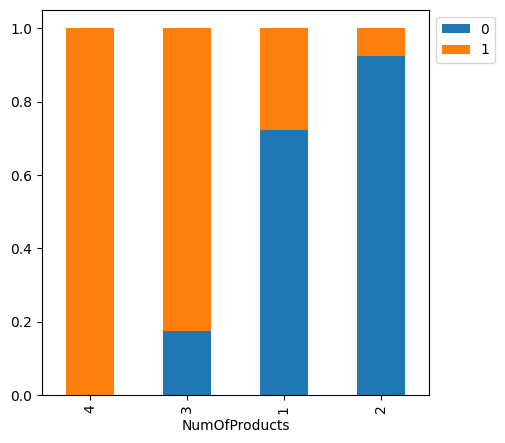

In [ ]:
stacked_barplot(data, "NumOfProducts", "Exited")

###Observations:
Churn rates by number of products
*   1: 1,409 / 5,084 ≈ 27.7%
*   2: 348 / 4,590 ≈ 7.6%
*   3: 220 / 266 ≈ 82.7%
*   4: 60 / 60 = 100%

Customers with 2 products have the lowest churn rate.

Customers with 3 or 4 products are very likely to churn, which is counterintuitive and concerning.

Customers with 1 product churn at a moderate rate.



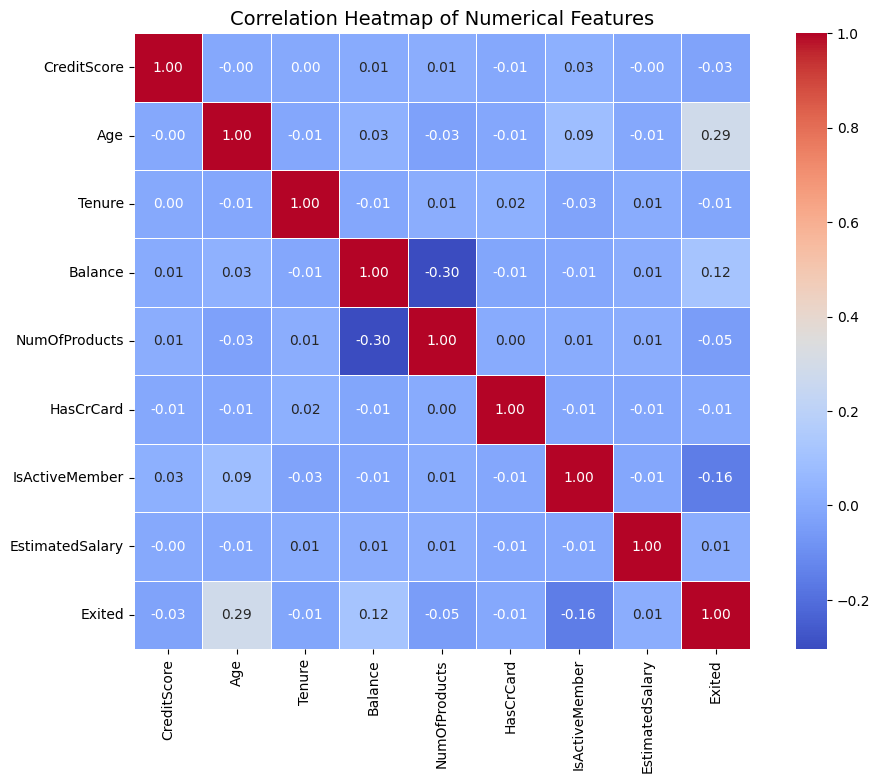

In [ ]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

###Observations:
The correlation heatmap reveals that Age has the strongest positive correlation with customer churn (Exited), indicating that older clients are more likely to leave the bank. In contrast, being an active member is negatively correlated with churn, suggesting that active clients are more likely to stay. Balance shows a mild positive relationship, while other features such as CreditScore, EstimatedSalary, Tenure, and HasCrCard exhibit very low or negligible correlation with churn.

##Class Distribution

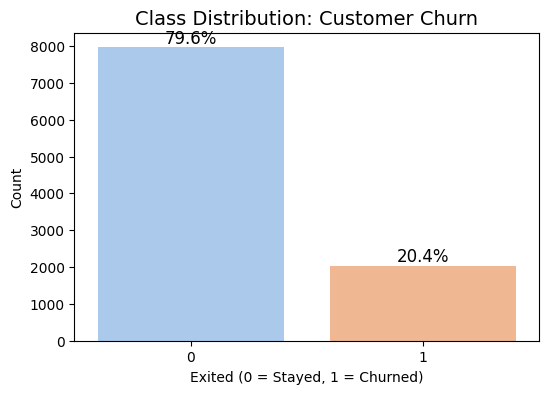

In [ ]:
# Count plot for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Exited', palette='pastel')

# Add percentages on bars
total = len(data)
for p in plt.gca().patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    plt.gca().annotate(percent, (p.get_x() + p.get_width() / 2., count),
                       ha='center', va='bottom', fontsize=12)

plt.title("Class Distribution: Customer Churn", fontsize=14)
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.show()


###Observations
The bar chart illustrates a significant class imbalance in the target variable Exited, which indicates customer churn. About 79.6% of customers have stayed with the bank (class 0), while only 20.4% have churned (class 1).
This imbalance is crucial to address in model training, as it may lead to biased predictions favoring the majority class. Techniques like SMOTE should be considered to ensure the model properly learns to identify churned customers.


## Data Preprocessing

### Dummy Variable Creation

In [ ]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].dtypes


,0
Geography_Germany,bool
Geography_Spain,bool
Gender_Male,bool


In [ ]:
data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = data[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)


In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


###Observations:
Dummy variable encoding was applied to categorical features like Geography and Gender.


### Train-validation-test Split

In [ ]:
#Separate features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [ ]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [ ]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


In [ ]:
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

###Observations:
The DataFrame is split into training, validation, and test sets, ensuring compatibility with frameworks like Keras and TensorFlow, which require inputs in NumPy array format.

### Data Normalization

In [ ]:
#normalize numerical data

num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_valid[num_cols] = scaler.transform(X_valid[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

###Observations:
Standard normalization (z-score scaling) is applied to the numerical features using StandardScaler from scikit-learn — a crucial preprocessing step before feeding data into neural networks.



## Model Building

### Model Evaluation Criterion

The F1-score is the best option in this scenario because we care more about correctly identifying churns (1s) than about accurately predicting all the non-churns (0s).

We want to avoid models that either flag every customer as at risk (resulting in high recall but low precision) or miss most churns (high precision but low recall).

By achieving a high F1-score, we can more effectively identify customers who are likely to leave, enabling our team to proactively engage them — making this metric highly valuable to the business.

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.2558869701726845), 1: np.float64(4.9079754601226995)}

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 30
batch_size = 32

### Neural Network with SGD Optimizer

- Let's start with a neural network consisting of
  - tree hidden layers with 64, 32 and 16 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initialize the neural network
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())

# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Third Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.4419 - val_loss: 0.5672
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.1264 - val_loss: 0.5022
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0412 - val_loss: 0.4986
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9826 - val_loss: 0.4893
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9393 - val_loss: 0.4799
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9078 - val_loss: 0.4818
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.8864 - val_loss: 0.4893
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8627 - val_loss: 0.4839
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8389 - val_loss: 0.4730
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8170 - val_loss: 0.4984
Epoch 11/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8046 - val_loss: 0.5029
Epoch 12/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  42.200400829315186


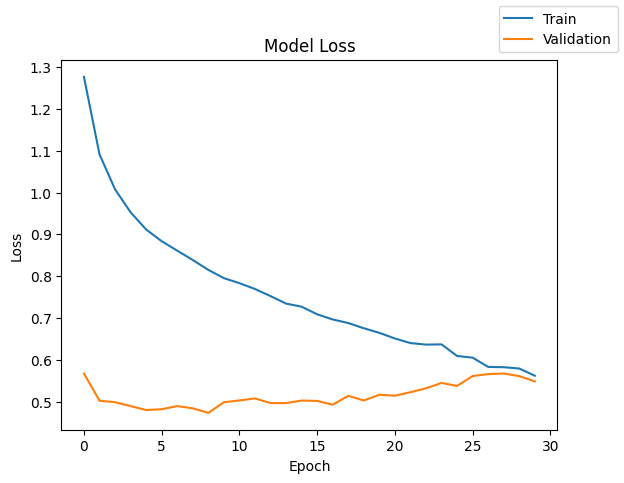

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.838281,0.838281,0.868412,0.847389


In [ ]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.78625,0.78625,0.820772,0.798271


###Observations:
*   The model performs well on both training and validation sets, with a moderate drop (~5%) in F1 score, which is acceptable.
*   The training loss steadily decreases across epochs, which is expected.
*   The validation loss is lower than the training loss for most of the training period, which is uncommon but can happen, especially with regularization (batch normalization).
*   No major signs of overfitting are present, though a slight divergence after epoch ~20 hints that early stopping or learning rate adjustment might help fine-tune furthe










## Model Performance Improvement

### Neural Network with Adam Optimizer

- Let's change the optimizer to Adam
    - This will introduce learning rate as well as callbacks such as EarlyStopping and ReduceLROnPlateau.
    

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initialize the neural network
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())

# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Third Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

In [ ]:
# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,callbacks=[early_stop, reduce_lr],class_weight=cw_dict,verbose=1)
end=time.time()

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5924 - auc: 0.6711 - loss: 1.4019 - precision: 0.2983 - recall: 0.6821 - val_accuracy: 0.7125 - val_auc: 0.7579 - val_loss: 0.5774 - val_precision: 0.3820 - val_recall: 0.6656 - learning_rate: 0.0010
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7129 - auc: 0.7928 - loss: 1.1154 - precision: 0.4032 - recall: 0.7341 - val_accuracy: 0.7738 - val_auc: 0.8079 - val_loss: 0.4999 - val_precision: 0.4640 - val_recall: 0.7117 - learning_rate: 0.0010
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7507 - auc: 0.8311 - loss: 1.0267 - precision: 0.4472 - recall: 0.7397 - val_accuracy: 0.7837 - val_auc: 0.8224 - val_loss: 0.4788 - val_precision: 0.4792 - val_recall: 0.7055 - learning_rate: 0.0010
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7657 - auc: 0.8519 - loss: 0.9694 - precision: 0.4679 - recall: 0.7543 - val_accuracy: 0.7800 - val_auc: 0.8278 - val_loss: 0.4835 - v

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  41.47882032394409


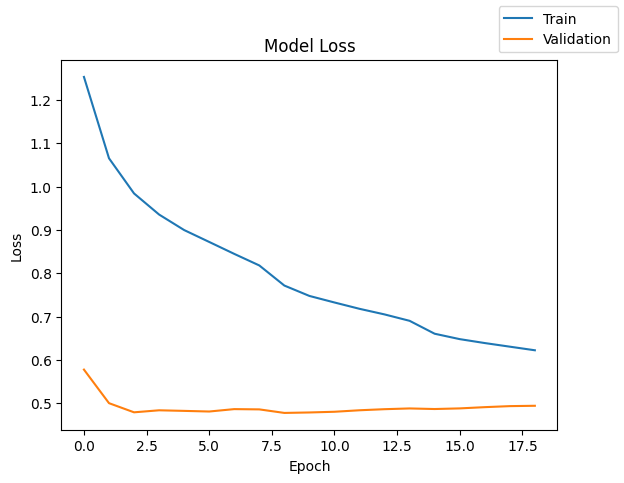

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.816094,0.816094,0.85553,0.827837


In [ ]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.785625,0.785625,0.827031,0.79915


###Observations:
The Adam optimizer provided stable and efficient convergence, and the model delivered solid metrics with low variance between training and validation.

### Neural Network with Adam Optimizer and Dropout

Let's now intorduce some dropouts to our Adam Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Initialize the neural network
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

In [ ]:
# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,callbacks=[early_stop, reduce_lr],class_weight=cw_dict,verbose=1)
end=time.time()

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5509 - auc: 0.5829 - loss: 1.4819 - precision: 0.2546 - recall: 0.5801 - val_accuracy: 0.7613 - val_auc: 0.7240 - val_loss: 0.5688 - val_precision: 0.4263 - val_recall: 0.4969 - learning_rate: 0.0010
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6582 - auc: 0.7178 - loss: 1.2650 - precision: 0.3426 - recall: 0.6655 - val_accuracy: 0.7356 - val_auc: 0.7593 - val_loss: 0.5481 - val_precision: 0.4076 - val_recall: 0.6564 - learning_rate: 0.0010
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6863 - auc: 0.7473 - loss: 1.2123 - precision: 0.3683 - recall: 0.6696 - val_accuracy: 0.7319 - val_auc: 0.7760 - val_loss: 0.5368 - val_precision: 0.4037 - val_recall: 0.6626 - learning_rate: 0.0010
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7002 - auc: 0.7610 - loss: 1.1887 - precision: 0.3849 - recall: 0.6932 - val_accuracy: 0.7450 - val_auc: 0.7941 - val_loss: 0.5126 - va

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  76.56148314476013


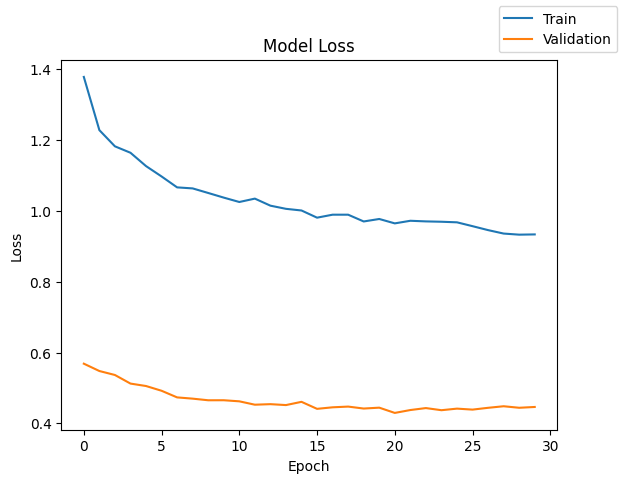

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.816562,0.816562,0.849194,0.827022


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.806875,0.806875,0.839344,0.817675


###Observations:
Adam optimizer with dropout regularization demonstrates strong performance and good generalization.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Let's now try applying SMOTE to the training set and use the SGD optimizer.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)
print(np.bincount(y_train_smote))


(10192, 11) (10192,)
[5096 5096]


In [ ]:
# Initialize the neural network
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())


# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())


# Third Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# Define the SGD optimizer
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01,     # Learning rate (can tune)
    momentum=0.9,           # Adds momentum to help accelerate learning
    nesterov=True           # Use Nesterov accelerated gradient (optional but often helpful)
)

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,callbacks=[early_stop, reduce_lr],class_weight=cw_dict,verbose=1)
end=time.time()

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6652 - loss: 1.2633 - val_accuracy: 0.7862 - val_loss: 0.4789 - learning_rate: 0.0100
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7455 - loss: 1.0497 - val_accuracy: 0.7437 - val_loss: 0.5183 - learning_rate: 0.0100
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7554 - loss: 1.0210 - val_accuracy: 0.7825 - val_loss: 0.4694 - learning_rate: 0.0100
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7635 - loss: 0.9858 - val_accuracy: 0.7669 - val_loss: 0.4764 - learning_rate: 0.0100
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7664 - loss: 0.9695 - val_accuracy: 0.7744 - val_loss: 0.4678 - learning_rate: 0.0100
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7755 - loss: 0.9472 - val_accuracy: 0.7800 - val_loss: 0.4686 - learning_rate: 0.0100
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 0.9305 -

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  27.221652507781982


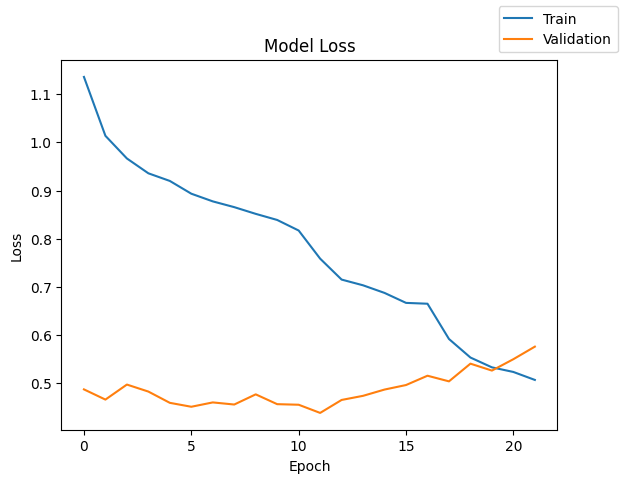

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.805141,0.805141,0.808685,0.80458


In [ ]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8,0.8,0.818037,0.807202


###Observtions:
Applying SMOTE to the training set in combination with the SGD optimizer appears to yield a well-balanced model. The training and validation loss curves are relatively aligned, indicating that the model remains stable throughout training. SMOTE effectively addresses the class imbalance issue, allowing the SGD optimizer to train a more balanced and robust classifier.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's try applying SMOTE but this time with Adam optimizer.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)
print(np.bincount(y_train_smote))

(10192, 11) (10192,)
[5096 5096]


In [ ]:
# Initialize the neural network
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())

# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Third Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,callbacks=[early_stop, reduce_lr],class_weight=cw_dict,verbose=1)
end=time.time()

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6103 - loss: 1.3800 - val_accuracy: 0.7769 - val_loss: 0.4921 - learning_rate: 0.0010
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7137 - loss: 1.0599 - val_accuracy: 0.7544 - val_loss: 0.5017 - learning_rate: 0.0010
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7549 - loss: 0.9922 - val_accuracy: 0.7550 - val_loss: 0.4991 - learning_rate: 0.0010
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7751 - loss: 0.9501 - val_accuracy: 0.7613 - val_loss: 0.4919 - learning_rate: 0.0010
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7878 - loss: 0.9166 - val_accuracy: 0.7694 - val_loss: 0.4872 - learning_rate: 0.0010
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7953 - loss: 0.8830 - val_accuracy: 0.7719 - val_loss: 0.4823 - learning_rate: 0.0010
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8122 - loss: 0.8500 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.891868829727173


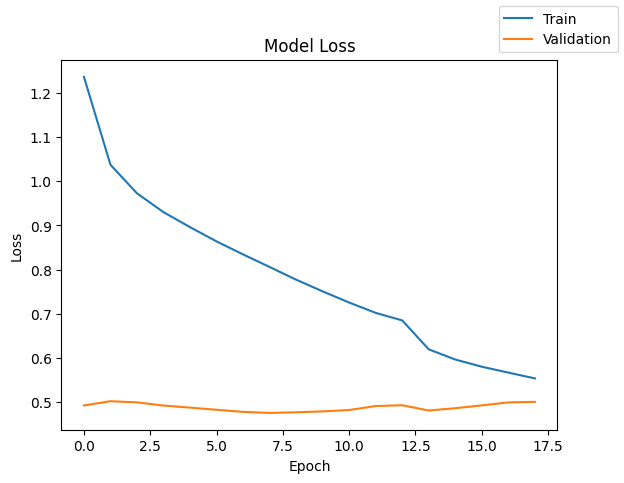

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.814757,0.814757,0.81548,0.81465


In [ ]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.781875,0.781875,0.823018,0.795513


###Observations:
 The training F1-score is approximately 0.8146 and the validation F1-score is 0.7955, indicating minimal performance drop across datasets and a well-generalizing model. The recall is strong on both sets, which is critical for churn prediction where false negatives (missed churns) are costly.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Let’s enhance our Adam optimizer model with SMOTE by adding Dropout layers to help reduce overfitting.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)
print(np.bincount(y_train_smote))

(10192, 11) (10192,)
[5096 5096]


In [ ]:
# Initialize the neural network
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

# Output Layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,callbacks=[early_stop, reduce_lr],class_weight=cw_dict,verbose=1)
end=time.time()

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5372 - loss: 1.6619 - val_accuracy: 0.7613 - val_loss: 0.5337 - learning_rate: 0.0010
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6427 - loss: 1.2933 - val_accuracy: 0.7675 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6869 - loss: 1.2185 - val_accuracy: 0.7594 - val_loss: 0.5019 - learning_rate: 0.0010
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7031 - loss: 1.1974 - val_accuracy: 0.7675 - val_loss: 0.4962 - learning_rate: 0.0010
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7111 - loss: 1.1636 - val_accuracy: 0.7744 - val_loss: 0.4820 - learning_rate: 0.0010
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7125 - loss: 1.1575 - val_accuracy: 0.7706 - val_loss: 0.4833 - learning_rate: 0.0010
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7264 - loss: 1.1277 - 

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  59.76143193244934


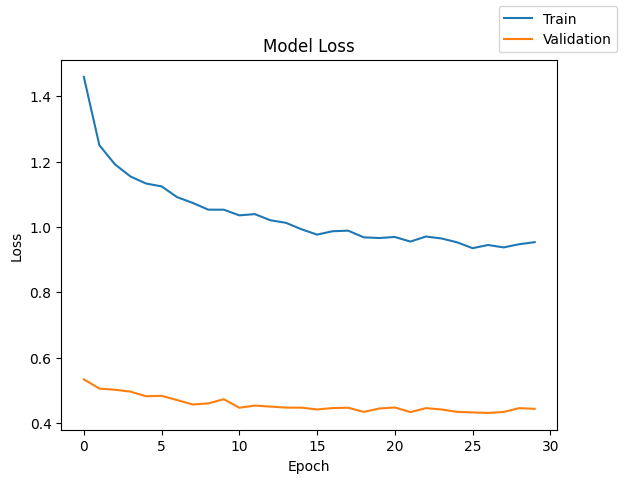

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model, X_train_smote, y_train_smote)
model_6_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.81044,0.81044,0.810881,0.810372


In [ ]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.800625,0.800625,0.835357,0.812148


###Observations
The loss curves are relatively smooth and stable, with no significant signs of divergence.

Excellent balance between precision and recall on the validation set — critical in churn prediction, where both false positives and false negatives are costly.

F1 score is slightly higher on the validation set, which is unusual but encouraging — it suggests the model generalizes well even after applying SMOTE and dropout.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network with SGD Optimizer",
    "Neural Network with Adam Optimizer",
    "Neural Network with Adam Optimizer and Dropout",
    "Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [

        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network with SGD Optimizer",
    "Neural Network with Adam Optimizer",
    "Neural Network with Adam Optimizer and Dropout",
    "Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout"
]

In [ ]:
models_train_comp_df.T

,Accuracy,Recall,Precision,F1 Score
Neural Network with SGD Optimizer,0.838281,0.838281,0.868412,0.847389
Neural Network with Adam Optimizer,0.816094,0.816094,0.855530,0.827837
Neural Network with Adam Optimizer and Dropout,0.816562,0.816562,0.849194,0.827022
Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer,0.805141,0.805141,0.808685,0.804580
Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer,0.814757,0.814757,0.815480,0.814650
"Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout",0.810440,0.810440,0.810881,0.810372


In [ ]:
models_valid_comp_df.T

,Accuracy,Recall,Precision,F1 Score
Neural Network with SGD Optimizer,0.786250,0.786250,0.820772,0.798271
Neural Network with Adam Optimizer,0.785625,0.785625,0.827031,0.799150
Neural Network with Adam Optimizer and Dropout,0.806875,0.806875,0.839344,0.817675
Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer,0.800000,0.800000,0.818037,0.807202
Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer,0.781875,0.781875,0.823018,0.795513
"Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout",0.800625,0.800625,0.835357,0.812148


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
Neural Network with SGD Optimizer,0.049118
Neural Network with Adam Optimizer,0.028688
Neural Network with Adam Optimizer and Dropout,0.009347
Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer,-0.002621
Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer,0.019137
"Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout",-0.001776


###Observations:
Neural Network with Adam Optimizer and Dropout yields the best F1 score on the validation set (≈ 0.8177), while keeping the training F1 score (≈ 0.8270) close, suggesting low overfitting and good generalization.

Neural Network with SGD Optimizer shows the highest training F1 score (≈ 0.8474), but the largest performance drop on validation (≈ 0.7983), leading to the biggest F1 gap (≈ 0.049) this may indicate overfitting.

Models trained with SMOTE (class balancing) tend to have slightly lower F1 scores on training but perform more consistently on validation. The model with SMOTE + Adam + Dropout shows the smallest F1 gap (≈ -0.0018), meaning the model is very stable across datasets.

####Model Selection
Based on the validation results and your business objective, the best choice is:

#####Neural Network with Adam Optimizer and Dropout

*   Highest validation F1 Score: 0.8177
*   Balanced precision (0.8393) and recall (0.8069) — meaning the model is catching most churners without many false alarms
*   Minimal overfitting: F1 gap between train and validation is very small (≈ 0.0093)
*   No synthetic data (unlike SMOTE), so predictions are learned only from actual customer behavior.

If your dataset were highly imbalanced and the model struggled to catch churners (low recall), SMOTE would help. But in this case SMOTE + Adam + Dropout slightly lowers validation performance (F1 ≈ 0.8121)







## Actionable Insights and Business Recommendations

###Insights

* Age and Churn Correlation: Age shows the strongest positive correlation with churn. Older clients are more likely to leave the bank, making age a key feature for segmenting high-risk customers.
*   Activity Matters: Being an active member is negatively correlated with churn. Inactive members are more likely to leave, highlighting that customer engagement directly contributes to retention.
*   Geographical Patterns: Clients from Germany exhibit a higher churn rate compared to those from France or Spain.
*   Low Predictive Features: Credit score, estimated salary, and credit card ownership show low correlation with churn. These features should be deprioritized in customer retention strategies.

###Business Recommendations

*   Target Older Clients for Retention Campaigns: Develop loyalty programs or personalized offers for older customer segments, who are at higher risk of churning.
*   Improve Client Engagement: Encourage the use of bank products and services to increase active member status—through digital channels, targeted incentives, or enhanced customer support.
*   Focus on At-Risk Geographies: Customers based in Germany may require tailored satisfaction and retention strategies.
*   Adopt Model in Churn Management Systems: Deploy the trained neural network model within the bank’s CRM system to flag high-risk customers in real time, enabling proactive engagement and retention efforts.







<font size=6 color='blue'>Power Ahead</font>
___